#### Breast Cancer Type Using RandomForest For Feature Selection

In [31]:
import numpy as np
import pandas as pd 

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [5]:
pd.set_option('max_columns',50)

In [6]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [8]:
#dropping id and 'Unnamed: 32'
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)
len(df)

569

In [9]:
df.diagnosis.unique()#only non float feature

array(['M', 'B'], dtype=object)

In [10]:
df.diagnosis=df.diagnosis.map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Let's do data exploration

In [11]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


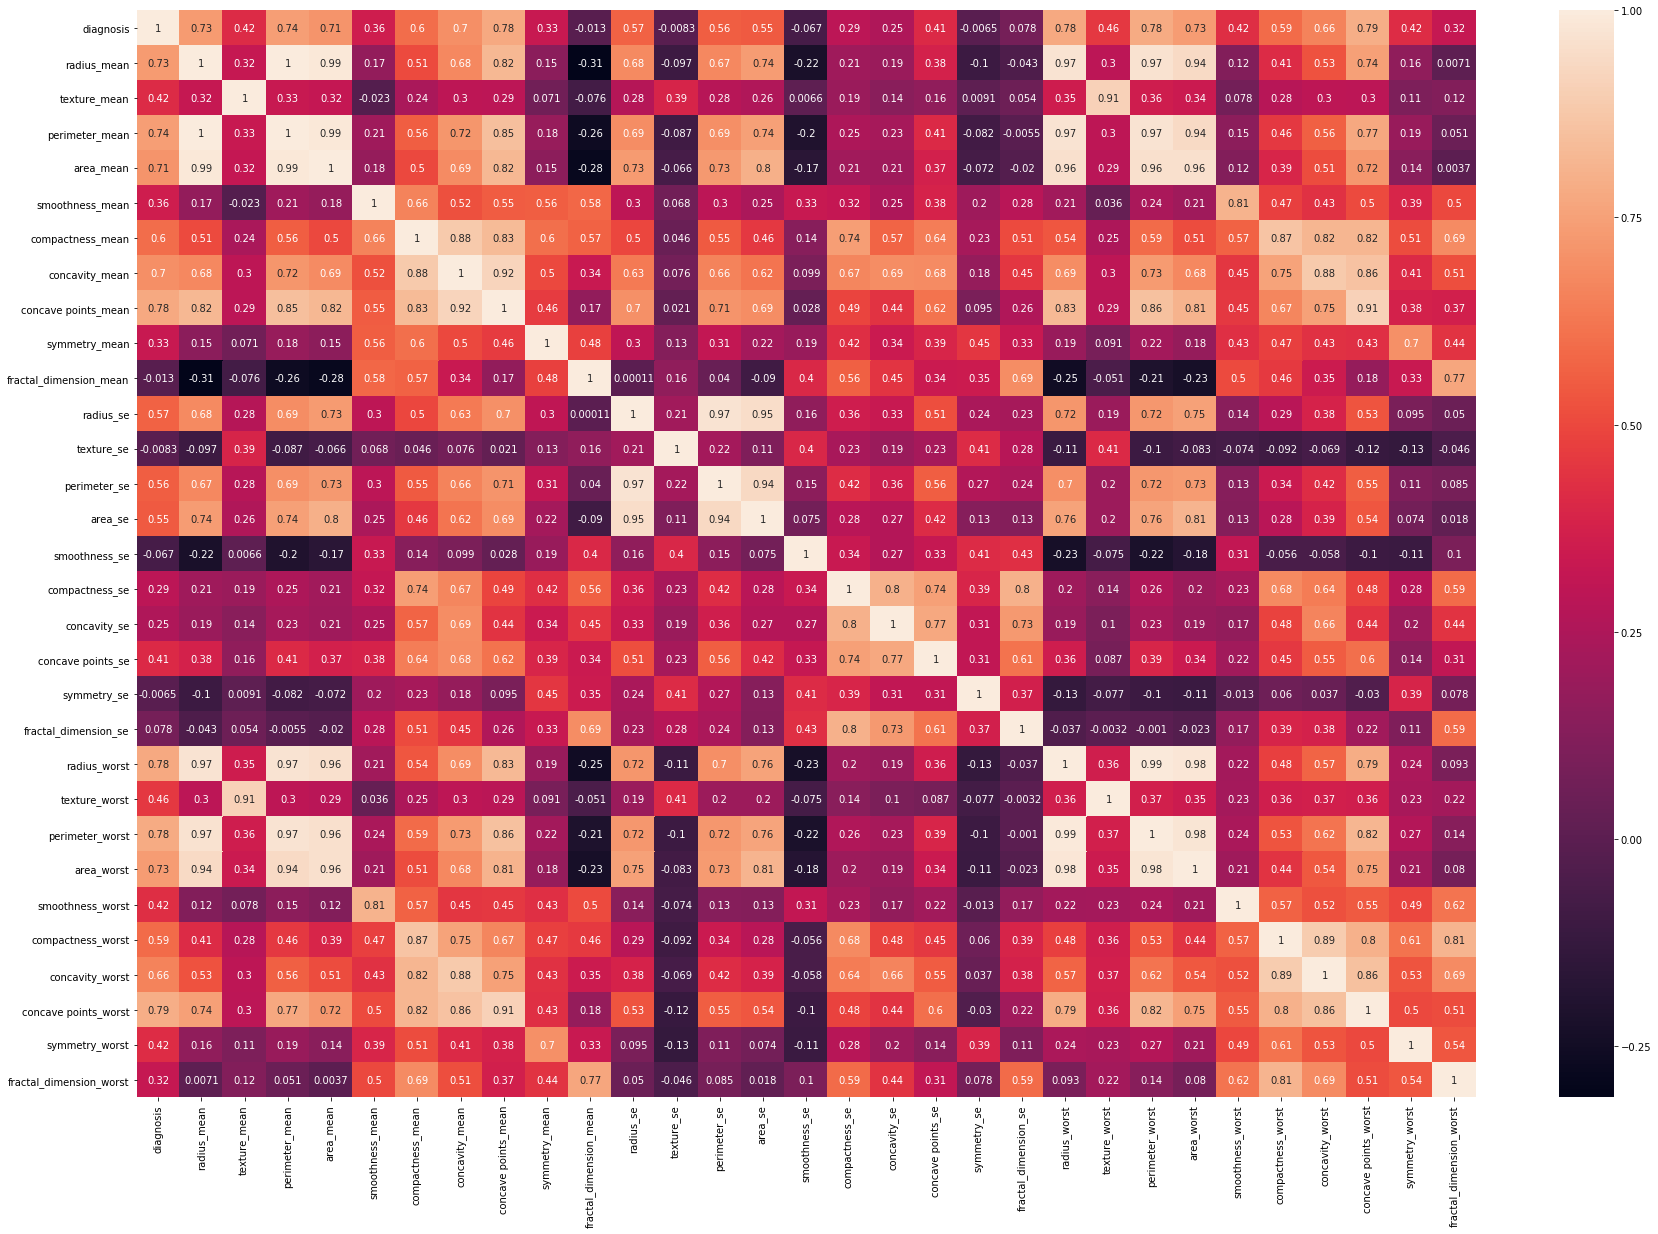

In [12]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

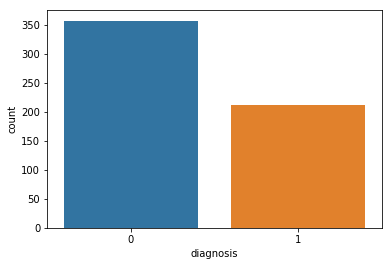

In [13]:
sns.countplot(df.diagnosis)

In [16]:
traindf, testdf = train_test_split(df, test_size = 0.3)

In [17]:
def classification_model(model, data, predictors, target):
  
  model.fit(data[predictors],data[target])

  predictions = model.predict(data[predictors])
  
  accuracy = metrics.accuracy_score(predictions,data[target])
  print("Accuracy :",np.round(accuracy,3)*100,'%')

 
  kf = KFold(data.shape[0], n_folds=5,random_state=1)
  error = []
  for train, test in kf:
   
    train_predictors = (data[predictors].iloc[train,:])
  
    train_target = data[target].iloc[train]
    
    model.fit(train_predictors, train_target)
   
    error.append(model.score(data[predictors].iloc[test,:], data[target].iloc[test]))
    
    print("Cross-Validation Score : ",np.round(np.mean(error),3)*100,'%')
    
  model.fit(data[predictors],data[target]) 

In [18]:
predictor_var = ['radius_mean','compactness_mean','concave points_mean']
target_var='diagnosis'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,target_var)

Accuracy : 89.7 %
Cross-Validation Score :  86.2 %
Cross-Validation Score :  88.1 %
Cross-Validation Score :  90.4 %
Cross-Validation Score :  90.3 %
Cross-Validation Score :  89.9 %


In [19]:
predictor_var = ['radius_mean']
model=LogisticRegression()
classification_model(model,traindf,predictor_var,target_var)

Accuracy : 89.7 %
Cross-Validation Score :  86.2 %
Cross-Validation Score :  88.1 %
Cross-Validation Score :  89.60000000000001 %
Cross-Validation Score :  89.7 %
Cross-Validation Score :  89.4 %


In [20]:
predictor_var = ['radius_mean','compactness_mean','concave points_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,target_var)

Accuracy : 100.0 %
Cross-Validation Score :  85.0 %
Cross-Validation Score :  86.9 %
Cross-Validation Score :  88.3 %
Cross-Validation Score :  88.1 %
Cross-Validation Score :  88.9 %


In [21]:
predictor_var = ['radius_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,target_var)

Accuracy : 97.0 %
Cross-Validation Score :  81.2 %
Cross-Validation Score :  83.1 %
Cross-Validation Score :  84.2 %
Cross-Validation Score :  84.3 %
Cross-Validation Score :  84.7 %


In [22]:
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7)
classification_model(model, traindf,predictor_var,target_var)

Accuracy : 96.7 %
Cross-Validation Score :  90.0 %
Cross-Validation Score :  91.3 %
Cross-Validation Score :  93.8 %
Cross-Validation Score :  93.4 %
Cross-Validation Score :  94.19999999999999 %


In [23]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

concave points_mean       0.297038
area_mean                 0.247042
perimeter_mean            0.165494
concavity_mean            0.101008
radius_mean               0.091782
compactness_mean          0.045712
texture_mean              0.029626
smoothness_mean           0.011467
symmetry_mean             0.006820
fractal_dimension_mean    0.004011
dtype: float64


In [24]:
predictor_var = ['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean',]
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
classification_model(model,traindf,predictor_var,target_var)

Accuracy : 95.5 %
Cross-Validation Score :  86.2 %
Cross-Validation Score :  88.8 %
Cross-Validation Score :  92.10000000000001 %
Cross-Validation Score :  92.2 %
Cross-Validation Score :  93.0 %


In [25]:
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7)
classification_model(model, testdf,predictor_var,target_var)
print("Test Accuracy :",np.round(model.score(testdf[predictor_var],testdf[target_var])*100,3),'%')

Accuracy : 94.19999999999999 %
Cross-Validation Score :  94.3 %
Cross-Validation Score :  94.19999999999999 %
Cross-Validation Score :  93.2 %
Cross-Validation Score :  92.7 %
Cross-Validation Score :  90.60000000000001 %
Test Accuracy : 94.152 %


###### 95% accuracy on test data

###### lets see for different depth

In [26]:

for i in np.arange(5,13,2):
    print("For depth ",i)
    predictor_var = features_mean
    model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=i)
    classification_model(model, testdf,predictor_var,target_var)
    print("Test Accuracy :",np.round(model.score(testdf[predictor_var],testdf[target_var])*100,3),'%')

For depth  5
Accuracy : 95.89999999999999 %
Cross-Validation Score :  94.3 %
Cross-Validation Score :  92.7 %
Cross-Validation Score :  92.2 %
Cross-Validation Score :  92.0 %
Cross-Validation Score :  90.0 %
Test Accuracy : 95.322 %
For depth  7
Accuracy : 95.89999999999999 %
Cross-Validation Score :  94.3 %
Cross-Validation Score :  92.7 %
Cross-Validation Score :  92.2 %
Cross-Validation Score :  92.0 %
Cross-Validation Score :  90.0 %
Test Accuracy : 95.322 %
For depth  9
Accuracy : 94.19999999999999 %
Cross-Validation Score :  94.3 %
Cross-Validation Score :  92.7 %
Cross-Validation Score :  93.2 %
Cross-Validation Score :  92.7 %
Cross-Validation Score :  91.2 %
Test Accuracy : 95.906 %
For depth  11
Accuracy : 94.69999999999999 %
Cross-Validation Score :  94.3 %
Cross-Validation Score :  91.3 %
Cross-Validation Score :  92.2 %
Cross-Validation Score :  92.0 %
Cross-Validation Score :  90.60000000000001 %
Test Accuracy : 95.322 %


###### it seems that 7 is better choice for  depth